In [1]:
from qiskit import *

In [2]:
#increment operator for a n-bit state register
def increment_op(qn):
    qa = 0 #ancillary bits
    
    if qn > 3: qa = qn - 1
        
    qr = QuantumRegister(qn + qa)
    increment_circ = QuantumCircuit(qr, name='increment')
    
    increment_circ.barrier()
    
    for x in range(qn,1,-1):
        if x > 3:
            increment_circ.mct(qr[0:x-1], qr[x-1], qr[x:x+qa])
        elif x == 3:
            increment_circ.ccx(qr[0], qr[1], qr[2])
        else: 
            increment_circ.cx(qr[0], qr[1])
        increment_circ.barrier()
            
    increment_circ.barrier()
    
    return increment_circ.to_instruction()

In [3]:
def decrement_op(qn):
    qa = 0 #ancillary bits
    
    if qn > 3: qa = qn - 1
    
    qr = QuantumRegister(qn + qa)
    decrement_circ = QuantumCircuit(qr, name='decrement')
    
    decrement_circ.x(qr[0:qn])
    decrement_circ.barrier()
    
    for x in range(qn,1,-1):
        if x > 3:
            decrement_circ.mct(qr[0:x-1], qr[x-1], qr[x:x+qa])
        elif x == 3:
            decrement_circ.ccx(qr[0], qr[1], qr[2])
        else: 
            decrement_circ.cx(qr[0], qr[1])
        decrement_circ.barrier()
        
    decrement_circ.barrier()
    decrement_circ.x(qr[0:qn])
    decrement_circ.barrier()
    
    return decrement_circ.to_instruction()

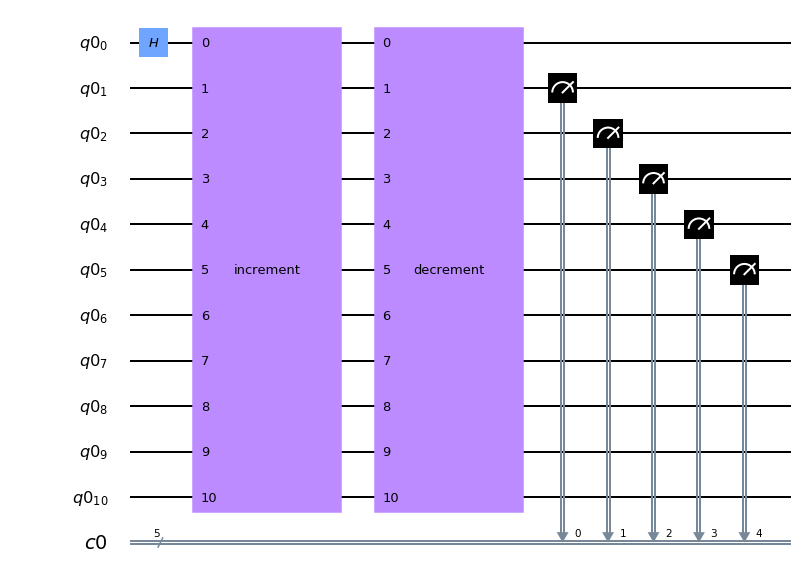

In [4]:
qn = 6
qa = 0
if qn > 3: qa = qn - 1 #add ancillary
    
qr = QuantumRegister(qn + qa)
cr = ClassicalRegister(qn-1)

#main circuit
circuit = QuantumCircuit(qr, cr)

#operator sub-circuit
incr_circ = increment_op(qn)
decr_circ = decrement_op(qn)

circuit.h(qr[0]) 

circuit.append(incr_circ, qr[0: qn + qa])
circuit.append(decr_circ, qr[0: qn + qa])

circuit.measure(qr[1:qn],cr)
    
circuit.draw(output='mpl')

In [5]:
#decomposed visualization of the circuit 
#decomposed = circuit.decompose()
#decomposed.draw(output="mpl")

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()

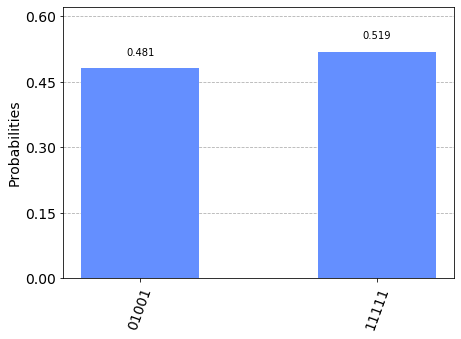

In [7]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [ ]:
#TODO: solve the issue, the left number should be 000001